# **Análise de viagens do Uber usando python**

Este projeto tem como objetivo analisar um dataset que contém dados de aproximadamente 4,5 milhões de viagens realizadas no aplicativo Uber em Nova Iorque de Abril a Setembro, 14,3 milhões de viagens de Janeiro a Junho de 2015.

A ideia é adicionarmos um algoritmo de machine learning para analisar o dataset.


Primeiro serão importadas as seguintes bibliotecas:


*   Pandas
*   Matplotlib
*   Seaborn



Além do arquivo que contém o dataset: 
**uber-raw-data-sep14.csv**

In [ ]:

Guilherme Veroneze - 201910753
Yago Rosestolato - 201910154
Hudson Loyo - 201910754
Lucas Abdouni- 201910149

In [ ]:
#importando as bibliotecas necessarias#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importando e lendo o dataset#
data = pd.read_csv("uber-raw-data-sep14.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [ ]:
#Transformando a data em dias, semanas e horas#
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


In [ ]:
# Alocando as colunas 'lat' e 'lon' do dataset 'data' na variálvel x
X=data.loc[:,['Lat','Lon']] 
X.head(6)

,Lat,Lon
0,40.2201,-74.0021
1,40.7500,-74.0027
2,40.7559,-73.9864
3,40.7450,-73.9889
4,40.8145,-73.9444
5,40.6735,-73.9918


In [ ]:
#Instalando a biblioeteca Kmeans#
!pip3 install KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importando Kmeans da sklearn cluster#
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

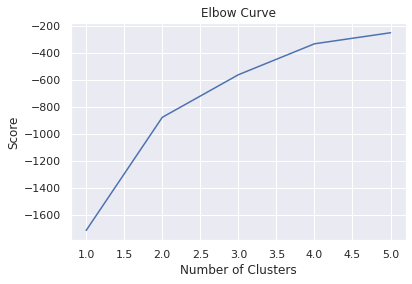

In [ ]:
#Aplicando o metodo o elbow method para validar o numero de clusters#
K_clusters = range(1,6)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['Lat']]
X_axis = data[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [ ]:
#A variavel kmeans vai receber o numeor de cluster#
kmeans = KMeans(n_clusters = 3, init ='k-means++') #Selecionando a quantidade de clusters#
kmeans.fit(data[data.columns[1:3]]) # Calculando clustering de k-means .
data['cluster_label'] = kmeans.fit_predict(data[data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordenadas do centroides.
labels = kmeans.predict(data[data.columns[1:3]]) # Etiqueta de cada ponto
data.head(10)

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour,cluster_label
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0,2
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0,1
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0,2
5,2014-09-01 00:12:00,40.6735,-73.9918,B02512,1,0,0,1
6,2014-09-01 00:15:00,40.7471,-73.6472,B02512,1,0,0,0
7,2014-09-01 00:16:00,40.6613,-74.2691,B02512,1,0,0,1
8,2014-09-01 00:32:00,40.3745,-73.9999,B02512,1,0,0,1
9,2014-09-01 00:33:00,40.7633,-73.9773,B02512,1,0,0,2


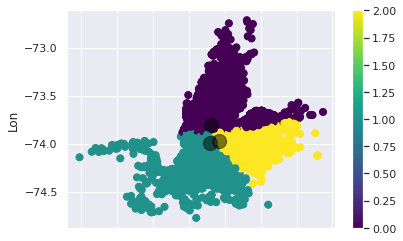

In [ ]:
#Mostrando a distruibuição de corridas de acordos com os centroides
data.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
#Adicionando a colona id para identificar cada linha
data['id'] = data.index
data = data[['id','cluster_label']]
data.head(5)

,id,cluster_label
0,0,1
1,1,1
2,2,2
3,3,1
4,4,2


In [ ]:
#Adicionando a coluna cluster label 
clustered_data = data.merge(data, left_on='id', right_on='cluster_label')
clustered_data.head(5)

,id_x,cluster_label_x,id_y,cluster_label_y
0,0,0,0,0
1,0,0,1,0
2,0,0,3,0
3,0,0,5,0
4,0,0,7,0


In [ ]:
#Gerou uma planilha no excel com cluster feito
clustered_data.to_csv ('clustered_data.csv', index=None, header = True)